<a href="https://colab.research.google.com/github/srilav/neuralnetwork/blob/main/M4_MP5_NB_Stock_Trading_using_DRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Mini Project: Stock Trading using DRL

## Learning Objectives

At the end of the experiment, you will be able to

* perform stock trading using Deep Reinforcement Learning
* build an environment for agent and perform stock trading
* experiment with SAC model and improve the reward
* create a dashboard for stock trading using `jupyter-dash`

## Information

Deep reinforcement learning combines artificial neural networks with a framework of reinforcement learning that helps software agents learn how to reach their goals. That is, it unites function approximation and target optimization, mapping states and actions to the rewards they lead to.

Reinforcement learning refers to goal-oriented algorithms, which learn how to achieve a complex objective (goal) or how to maximize along a particular dimension over many steps; for example, they can maximize the points won in a game over many moves. Reinforcement learning algorithms can start from a blank slate, and under the right conditions, achieve superhuman performance. Like a pet incentivized by scolding and treats, these algorithms are penalized when they make the wrong decisions and rewarded when they make the right ones – this is reinforcement.

![img](https://miro.medium.com/max/974/0*NgZ_bq_nUOq73jK_.png)

**SAC:** Soft Actor Critic is defined for RL tasks involving continuous actions. The biggest feature of SAC is that it uses a modified RL objective function. Instead of only seeking to maximize the lifetime rewards, SAC seeks to also maximize the entropy of the policy. The term ‘entropy’ has a rather esoteric definition and many interpretations depending on the application

![img](https://miro.medium.com/max/353/0*5Y3SzMyOQZBRUhrh.png)

Fig: Actor-Critic architecture. Source: Medium

Learning of the actor is based policy gradient approach and critic is learned in value-based fashion. In SAC, there are three networks: the first network represents state-value(V) parameterised by ψ, the second one is a policy function that parameterised by ϕ, and the last one represents soft q function parameterised by θ.

Read More about SAC [here](https://arxiv.org/abs/1801.01290)

## Dataset

### Dataset Description

The Dataset chosen for this mini project is NIFTY50 Stock tradings. The data is the price history and trading volumes of the fifty stocks in the index NIFTY 50 from NSE (National Stock Exchange) India. All stocks are at a day-level with pricing and trading values split across. The NIFTY 50 is a diversified 50 stock index accounting for 13 sectors of the economy.

See the stock indexes of NIFTY 50 in the following [link](https://www1.nseindia.com/products/content/equities/indices/nifty_50.htm)

**Note:** Choose the NIFTY 50 ticker symbols and download the stock data from '2009-01-01' to '2021-09-01' using YahooDownloader

## Grading = 10 Points

In [1]:
#@title Install FinRL, other necessary libraries and extensions
!pip -qq install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

!pip install -q jupyter-dash==0.3.0rc1 dash-bootstrap-components

!pip install pyyaml==5.4.1

!pip install macrodemos --upgrade
!pip install -q dash==2.0.0

     |████████████████████████████████| 234 kB 8.6 MB/s 
     |████████████████████████████████| 177 kB 46.5 MB/s 
     |████████████████████████████████| 53.2 MB 208 kB/s 
     |████████████████████████████████| 1.2 MB 38.1 MB/s 
     |████████████████████████████████| 125 kB 47.5 MB/s 
     |████████████████████████████████| 150 kB 41.1 MB/s 
     |████████████████████████████████| 2.6 MB 32.6 MB/s 
     |████████████████████████████████| 153 kB 50.0 MB/s 
     |████████████████████████████████| 952 kB 36.8 MB/s 
     |████████████████████████████████| 197 kB 48.9 MB/s 
     |████████████████████████████████| 91.7 MB 1.4 MB/s 
     |████████████████████████████████| 448 kB 48.5 MB/s 
     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 3.6 MB 32.1 MB/s 
     |████████████████████████████████| 271 kB 47.0 MB/s 
     |████████████████████████████████| 2.6 MB 36.3 MB/s 
     |████████████████████████████████| 2.6 MB 36.8 MB/s 
     |███████████

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/nifty50list.csv

!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/df_account_value.csv

### Import required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')
import warnings
warnings.filterwarnings("ignore")
import datetime
import os
from finrl import config
from finrl.finrl_meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.finrl_meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.finrl_meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
import sys
sys.path.append("../FinRL-Library")

### Data Loading (1 point)

* Read the ticker symbols of Nifty 50 and add `.NS` extension

* Using the symbols download the stock prices data using YahooDownloader

Hint: [YahooDownloader](https://gist.githubusercontent.com/BruceYanghy/6c37022257cfe765d551c1b173570bd4/raw/b2c69214c6316ff8fa46d9b14d437ec6a1edeef2/DownloadData.py)

In [ ]:
path = "/content/nifty50list.csv"
# YOUR CODE HERE

In [ ]:
DOW_50_TICKER = pd.read_csv(path)

In [ ]:
DOW_50_TICKER.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,ACC Ltd.,CEMENT & CEMENT PRODUCTS,ACC,EQ,INE012A01025
1,Abbott India Ltd.,PHARMA,ABBOTINDIA,EQ,INE358A01014
2,Adani Enterprises Ltd.,METALS,ADANIENT,EQ,INE423A01024
3,Adani Green Energy Ltd.,POWER,ADANIGREEN,EQ,INE364U01010
4,Adani Transmission Ltd.,POWER,ADANITRANS,EQ,INE931S01010


In [ ]:
DOW_50_TICKER.Symbol

0            ACC
1     ABBOTINDIA
2       ADANIENT
3     ADANIGREEN
4     ADANITRANS
5          ALKEM
6      AMBUJACEM
7     APOLLOHOSP
8     AUROPHARMA
9          DMART
10    BAJAJHLDNG
11    BANDHANBNK
12    BERGEPAINT
13        BIOCON
14      BOSCHLTD
15      CADILAHC
16        COLPAL
17           DLF
18         DABUR
19          GAIL
20         GLAND
21      GODREJCP
22       HDFCAMC
23       HAVELLS
24     HINDPETRO
25       ICICIGI
26    ICICIPRULI
27           IGL
28    INDUSTOWER
29        NAUKRI
30        INDIGO
31      JUBLFOOD
32           LTI
33         LUPIN
34           MRF
35        MARICO
36    MUTHOOTFIN
37          NMDC
38      PETRONET
39    PIDILITIND
40           PEL
41          PGHH
42           PNB
43       SBICARD
44       SIEMENS
45    TORNTPHARM
46           UBL
47    MCDOWELL-N
48          VEDL
49       YESBANK
Name: Symbol, dtype: object

In [ ]:
""" Download and save the data in a pandas DataFrame """

start_date = '2009-01-01'
end_date = '2021-09-01'
# Download and save the data in a pandas DataFrame:
df = YahooDownloader(start_date,
                     end_date,
                     ticker_list = DOW_50_TICKER.Symbol).fetch_data()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ABBOTINDIA: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ADANIENT: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ADANIGREEN: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ADANITRANS: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ALKEM: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AMBUJACEM: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AP

In [ ]:
df.head()

,date,open,high,low,close,volume,tic,day
0,2009-01-02,20.570000,20.760000,19.520000,11.407825,763300.0,ACC,4
1,2009-01-02,20.480000,20.980000,20.299999,20.740000,888830.0,IGL,4
2,2009-01-02,104.230003,108.129997,104.230003,106.400002,2973855.0,PNB,4
3,2009-01-02,31.881800,33.472698,30.290899,31.590900,11970970.0,UBL,4
4,2009-01-05,19.770000,19.770000,18.660000,11.186764,1191100.0,ACC,0


### Preprocess Data (1 point)

FinRL uses a `FeatureEngineer` class to preprocess data. Some of the technical indicators to be used in the analysis of financial markets includes.

1. `relative strength index` (RSI): it represents the size of recent gains and losses, during a specified time period.
2. `moving average convergence divergence` (MACD):  it is an indicator to determine price momentum and short term trend.
3. `commodity channel index` (CCI): its an indicator helps in identifying cyclical trends.
4. `directional index` (DX): it represents group of directional movements that form trading system

* Configure the technical indicators and apply feature engineering

  Hint: `FeatureEngineer()`

In [ ]:
df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d')

In [ ]:
df.sort_values(['date','tic'],ignore_index=True).head()

,date,open,high,low,close,volume,tic,day
0,2009-01-02,20.570000,20.760000,19.520000,11.407825,763300.0,ACC,4
1,2009-01-02,20.480000,20.980000,20.299999,20.740000,888830.0,IGL,4
2,2009-01-02,104.230003,108.129997,104.230003,106.400002,2973855.0,PNB,4
3,2009-01-02,31.881800,33.472698,30.290899,31.590900,11970970.0,UBL,4
4,2009-01-05,19.770000,19.770000,18.660000,11.186764,1191100.0,ACC,0


In [ ]:
tech_indicator_list = config.INDICATORS
print(tech_indicator_list)

['macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30', 'close_30_sma', 'close_60_sma']


In [ ]:
fe = FeatureEngineer(
                    use_technical_indicator=True,
                    tech_indicator_list = tech_indicator_list,
                    use_turbulence=False,
                    user_defined_feature = False)

df = fe.preprocess_data(df)
df.head()

Successfully added technical indicators


,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma
0,2009-01-02,20.570000,20.760000,19.520000,11.407825,763300.0,ACC,4,0.000000,11.609923,10.984666,0.000000,-66.666667,100.000000,11.407825,11.407825
1,2009-01-05,19.770000,19.770000,18.660000,11.186764,1191100.0,ACC,0,-0.004960,11.609923,10.984666,0.000000,-66.666667,100.000000,11.297295,11.297295
2,2009-01-06,19.370001,20.620001,19.230000,11.966297,950600.0,ACC,1,0.017854,12.323801,10.716790,78.484967,54.512417,2.749061,11.520295,11.520295
3,2009-01-07,20.340000,21.000000,20.030001,11.867394,699700.0,ACC,2,0.024221,12.349291,10.864850,71.155205,98.373380,21.918990,11.607070,11.607070
4,2009-01-08,20.370001,20.910000,19.930000,12.041920,1070300.0,ACC,3,0.034116,12.445335,10.942745,75.356467,81.421988,15.513642,11.694040,11.694040


In [ ]:
""" Perform Feature Engineering """
df1 = FeatureEngineer(use_technical_indicator=True, use_turbulence=False).preprocess_data(df.copy())


# add covariance matrix as states
df1=df1.sort_values(['date','tic'],ignore_index=True)
df1.index = df1.date.factorize()[0]

cov_list = []
# look back is one year
lookback=252
for i in range(lookback,len(df1.index.unique())):
  data_lookback = df1.loc[i-lookback:i,:]
  price_lookback=data_lookback.pivot_table(index = 'date',columns = 'tic', values = 'close')
  return_lookback = price_lookback.pct_change().dropna()
  covs = return_lookback.cov().values 
  cov_list.append(covs)
  
df_cov = pd.DataFrame({'date':df1.date.unique()[lookback:],'cov_list':cov_list})
df1 = df1.merge(df_cov, on='date')
df1 = df1.sort_values(['date','tic']).reset_index(drop=True)
df1.head()

Successfully added technical indicators


,date,open,high,low,close,volume,tic,day,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,cov_list
0,2010-01-04,28.389999,28.770000,27.100000,16.887299,628900.0,ACC,0,0.194004,17.939628,16.249294,51.571447,37.393225,3.214785,16.939090,16.667815,[[0.00158589341600807]]
1,2010-01-05,27.360001,27.440001,26.760000,16.616016,861400.0,ACC,1,0.128162,17.948084,16.220492,49.640884,-47.587525,4.697722,16.929431,16.676235,[[0.0015853635175786386]]
2,2010-01-06,26.930000,27.090000,26.150000,16.307745,1621800.0,ACC,2,0.050525,17.949778,16.217565,47.548474,-96.729005,16.913411,16.911757,16.672718,[[0.0015689207547665792]]
3,2010-01-07,26.469999,26.950001,26.299999,16.579027,476400.0,ACC,3,0.010763,17.930756,16.255701,49.486785,-78.901915,16.913411,16.900865,16.671592,[[0.0015693437831114123]]
4,2010-01-08,26.730000,26.820000,26.360001,16.424889,253500.0,ACC,4,-0.032809,17.935574,16.246568,48.434737,-85.173924,16.913411,16.899426,16.673680,[[0.0015692194942528127]]


### Exploratory Data Analysis (2 points)

#### Describe the statistics of the data

In [ ]:
# YOUR CODE HERE

#### Find how many times did the stock prices end lower than their opening prices in 2019 vs in 2020?

**Hint:** Open - Close per day

In [ ]:
# YOUR CODE HERE

#### Find the stock that shows the highest increase in stock price per day, over the entire time period

In [ ]:
# YOUR CODE HERE

#### Find the loss percentage of each stock considering open and closing prices of each day

**Hint:** `sum(open - close) / len(instances)`

In [ ]:
# YOUR CODE HERE

#### Find the Top 10 Stocks with high volume

In [ ]:
# YOUR CODE HERE

#### Plot the closing value of stock with highest volume and returns

In [ ]:
# YOUR CODE HERE

#### Daily Returns of the stocks

* Apply pct_change() and extract daily returns

* Plot the histogram of daily returns

* Find the stock with maximum daily return

In [ ]:
# YOUR CODE HERE

### Train & Trade Data Split

In real life trading, the model needs to be updated periodically using rolling windows. Here, we just slice the data once into train and trade set.

In [ ]:
PATH_TO_MODEL_DIR = 'drive/MyDrive/FinRLManystock/'
print(PATH_TO_MODEL_DIR)
import os
if not os.path.exists(PATH_TO_MODEL_DIR +'saved'):
  os.makedirs(PATH_TO_MODEL_DIR+'saved')
if not os.path.exists(PATH_TO_MODEL_DIR + 'trained_model_data'):
  os.makedirs(PATH_TO_MODEL_DIR + 'trained_model_data')
if not os.path.exists(PATH_TO_MODEL_DIR + 'tensor'):
  os.makedirs(PATH_TO_MODEL_DIR + 'tensor')
if not os.path.exists(PATH_TO_MODEL_DIR + 'results'):
  os.makedirs(PATH_TO_MODEL_DIR + 'results')

drive/MyDrive/FinRLManystock/


In [ ]:
train = data_split(df, start_date, '2020-12-31')
trade = data_split(df, '2021-01-01', end_date)
train.to_csv(PATH_TO_MODEL_DIR + 'saved' + '/train_MULTI.csv',index=False)
trade.to_csv(PATH_TO_MODEL_DIR + 'saved' + '/trade_MULTI.csv',index=False)

### Build Environment (1 point)


* Define the below kwargs to be used in Stock Trading Environment

  * stock_dim: (int) number of unique stocks
  * hmax : (int) maximum number of shares to trade
  * initial_amount: (int) start money
  * transaction_cost_pct : (float) transaction cost percentage per trade
  * reward_scaling: (float) scaling factor for reward, good for training
  * tech_indicator_list: (list) a list of technical indicator names (modified from config.py)

In [ ]:
# Compute State Space and Action Space
stock_dimension = len(train.tic.unique())
state_space = 1 + 2*stock_dimension + len(config.INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 1, State Space: 11


In [ ]:
# New
buy_cost_list = [0.001] * stock_dimension
sell_cost_list = [0.001] * stock_dimension
num_stock_shares = [0] * stock_dimension

# Initialize an environment class
env_kwargs = {
    "hmax": 100,                                                # max number of share purchases allowed per asset
    "initial_amount": 1000000,                                  # amount of cash initially available
    "buy_cost_pct": buy_cost_list,                              # cost for buying shares
    "sell_cost_pct": sell_cost_list,                            # cost for selling shares
    "state_space": state_space,                                 # contains all of the environment’s data to be observed by the agent
    "stock_dim": stock_dimension,
    "num_stock_shares": num_stock_shares, 
    "tech_indicator_list": config.INDICATORS, 
    "action_space": stock_dimension,                            # contain all of the actions possible for an agent to take in the environment
    "reward_scaling": 1e-4 }                                    # scaling value to multiply reward by at each step

e_train_gym = StockTradingEnv(df = train, **env_kwargs)
env_train, _ = e_train_gym.get_sb_env()
print(type(env_train))

<class 'stable_baselines3.common.vec_env.dummy_vec_env.DummyVecEnv'>


### Implement DRL Algorithm (2 points)

Use Soft Actor-Critic (SAC) for stock trading, it is one of the most recent state-of-art algorithms. SAC is featured by its stability. 

* Define the SAC parameters and train the SAC model
* Optimize the parameters to improve the reward

In [ ]:
# Train SAC Model
agent = DRLAgent(env = env_train)
SAC_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 200,
    "ent_coef": "auto_0.1"
}
model_sac = agent.get_model("sac",model_kwargs = SAC_PARAMS)
trained_sac = agent.train_model(model=model_sac, 
                             tb_log_name='sac',
                             total_timesteps=30000)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 200, 'ent_coef': 'auto_0.1'}
Using cuda device
---------------------------------
| time/              |          |
|    episodes        | 4        |
|    fps             | 76       |
|    time_elapsed    | 157      |
|    total_timesteps | 12080    |
| train/             |          |
|    actor_loss      | 1.07e+04 |
|    critic_loss     | 1.8e+04  |
|    ent_coef        | 0.328    |
|    ent_coef_loss   | 10.4     |
|    learning_rate   | 0.0001   |
|    n_updates       | 11879    |
|    reward          | 0.0      |
---------------------------------
---------------------------------
| time/              |          |
|    episodes        | 8        |
|    fps             | 76       |
|    time_elapsed    | 315      |
|    total_timesteps | 24160    |
| train/             |          |
|    actor_loss      | 6.28e+03 |
|    critic_loss     | 5.65e+04 |
|    ent_coef        | 1.1      |
|    ent_coef_lo

#### Optional: Implement other DRL Algorithms

In [ ]:
# Train ddpq Model
agent = DRLAgent(env = env_train)
DDPG_PARAMS = {
    "batch_size": 128,
    "buffer_size": 100000,
    "learning_rate": 0.0001,
    "learning_starts": 200
}
model_ddpg = agent.get_model("ddpg",model_kwargs = DDPG_PARAMS)
trained_sac = agent.train_model(model=model_ddpg, 
                             tb_log_name='ddpg',
                             total_timesteps=30000)

{'batch_size': 128, 'buffer_size': 100000, 'learning_rate': 0.0001, 'learning_starts': 200}
Using cuda device
----------------------------------
| time/              |           |
|    episodes        | 4         |
|    fps             | 148       |
|    time_elapsed    | 81        |
|    total_timesteps | 12080     |
| train/             |           |
|    actor_loss      | -2.46e+04 |
|    critic_loss     | 3.44e+05  |
|    learning_rate   | 0.0001    |
|    n_updates       | 9060      |
|    reward          | 0.0       |
----------------------------------
----------------------------------
| time/              |           |
|    episodes        | 8         |
|    fps             | 131       |
|    time_elapsed    | 183       |
|    total_timesteps | 24160     |
| train/             |           |
|    actor_loss      | -1.31e+04 |
|    critic_loss     | 1.33e+05  |
|    learning_rate   | 0.0001    |
|    n_updates       | 21140     |
|    reward          | 0.0       |
---------------

In [ ]:
# Train ppo Model
agent = DRLAgent(env = env_train)
PPO_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.005,
    "batch_size": 128,
    "learning_rate": 0.0001
}
model_ppo = agent.get_model("ppo",model_kwargs = PPO_PARAMS)
trained_sac = agent.train_model(model=model_ppo, 
                             tb_log_name='ppo',
                             total_timesteps=30000)

{'n_steps': 2048, 'ent_coef': 0.005, 'batch_size': 128, 'learning_rate': 0.0001}
Using cuda device
-----------------------------------
| time/              |            |
|    fps             | 522        |
|    iterations      | 1          |
|    time_elapsed    | 3          |
|    total_timesteps | 2048       |
| train/             |            |
|    reward          | -0.0173891 |
-----------------------------------
-------------------------------------------
| time/                   |               |
|    fps                  | 486           |
|    iterations           | 2             |
|    time_elapsed         | 8             |
|    total_timesteps      | 4096          |
| train/                  |               |
|    approx_kl            | 0.00073463214 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -1.42         |
|    explained_variance   | 0             |
|    learning_rate        | 0.0001        |
|    

In [ ]:
# Train A2C Model
agent = DRLAgent(env = env_train)
A2C_PARAMS = {
    "n_steps": 2048,
    "ent_coef": 0.005,
    "learning_rate": 0.0001
}
model_a2c = agent.get_model("a2c",model_kwargs = A2C_PARAMS)
trained_a2c = agent.train_model(model=model_a2c, 
                             tb_log_name='a2c',
                             total_timesteps=30000)

{'n_steps': 2048, 'ent_coef': 0.005, 'learning_rate': 0.0001}
Using cuda device
day: 3019, episode: 40
begin_total_asset: 1000000.00
end_total_asset: 984662.20
total_reward: -15337.80
total_cost: 5214.09
total_trades: 2864
Sharpe: -0.280


### Trading (1 point)

* Build the Environment for trading
* Use the trained SAC model to trade

In [ ]:
""" Create trading env and make prediction and get the account value change """
# YOUR CODE HERE
# Create trading env
e_trade_gym = StockTradingEnv(df = trade, **env_kwargs)

# Make prediction and get the account value change
df_account_value, df_actions = DRLAgent.DRL_prediction(model = trained_sac, environment = e_trade_gym)

hit end!


In [ ]:
df_account_value.head()

,date,account_value
0,2021-01-04,1.000000e+06
1,2021-01-05,1.000000e+06
2,2021-01-06,1.000027e+06
3,2021-01-07,1.000045e+06
4,2021-01-08,1.000039e+06


### Backtesting Performance (Optional)

Backtesting plays a key role in evaluating the performance of a trading strategy. Backtesting assesses the viability of a trading strategy by discovering how it would perform on historical data. If backtesting works, traders and analysts may have increased confidence to employ it going forward.Automated backtesting tool is preferred because it reduces the human error.

`FinRL` uses a set of functions to do the backtesting with [Quantopian pyfolio](https://github.com/quantopian/pyfolio) package. It is easy to use and consists of various individual plots that provide a comprehensive image of the performance of a trading strategy.

* Perform backtest on the account values and baseline data

In [ ]:
""" BackTest Stats """
perf_stats_all = backtest_stats(account_value = df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

Annual return          0.027242
Cumulative returns     0.017971
Annual volatility      0.015900
Sharpe ratio           1.708604
Calmar ratio           3.824973
Stability              0.868500
Max drawdown          -0.007122
Omega ratio            1.361110
Sortino ratio          2.701310
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.338417
Daily value at risk   -0.001895
dtype: float64


#### Plot the Backtest plot with baseline ticker as "^NSEI"

In [ ]:
# Baseline stats
baseline_df = get_baseline(ticker = '^NSEI',
                            start = '2020-01-01',
                            end = '2021-09-01')
stats = backtest_stats(baseline_df, value_col_name = 'close')

[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (414, 8)
Annual return          0.230647
Cumulative returns     0.406296
Annual volatility      0.264460
Sharpe ratio           0.921209
Calmar ratio           0.600022
Stability              0.728342
Max drawdown          -0.384399
Omega ratio            1.204265
Sortino ratio          1.218615
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.929960
Daily value at risk   -0.032352
dtype: float64


[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (414, 8)


Start date,2021-01-04
End date,2021-08-31
Total months,7
,Backtest
Annual return,2.724%
Cumulative returns,1.797%
Annual volatility,1.59%
Sharpe ratio,1.71
Calmar ratio,3.82
Stability,0.87
Max drawdown,-0.712%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,0.71,2021-07-27,2021-08-10,2021-08-27,24
1,0.47,2021-06-14,2021-06-30,2021-07-07,18
2,0.41,2021-07-16,2021-07-19,2021-07-20,3
3,0.26,2021-03-15,2021-03-19,2021-04-20,27
4,0.22,2021-02-22,2021-03-04,2021-03-12,15


Stress Events,mean,min,max
New Normal,0.01%,-0.41%,0.43%


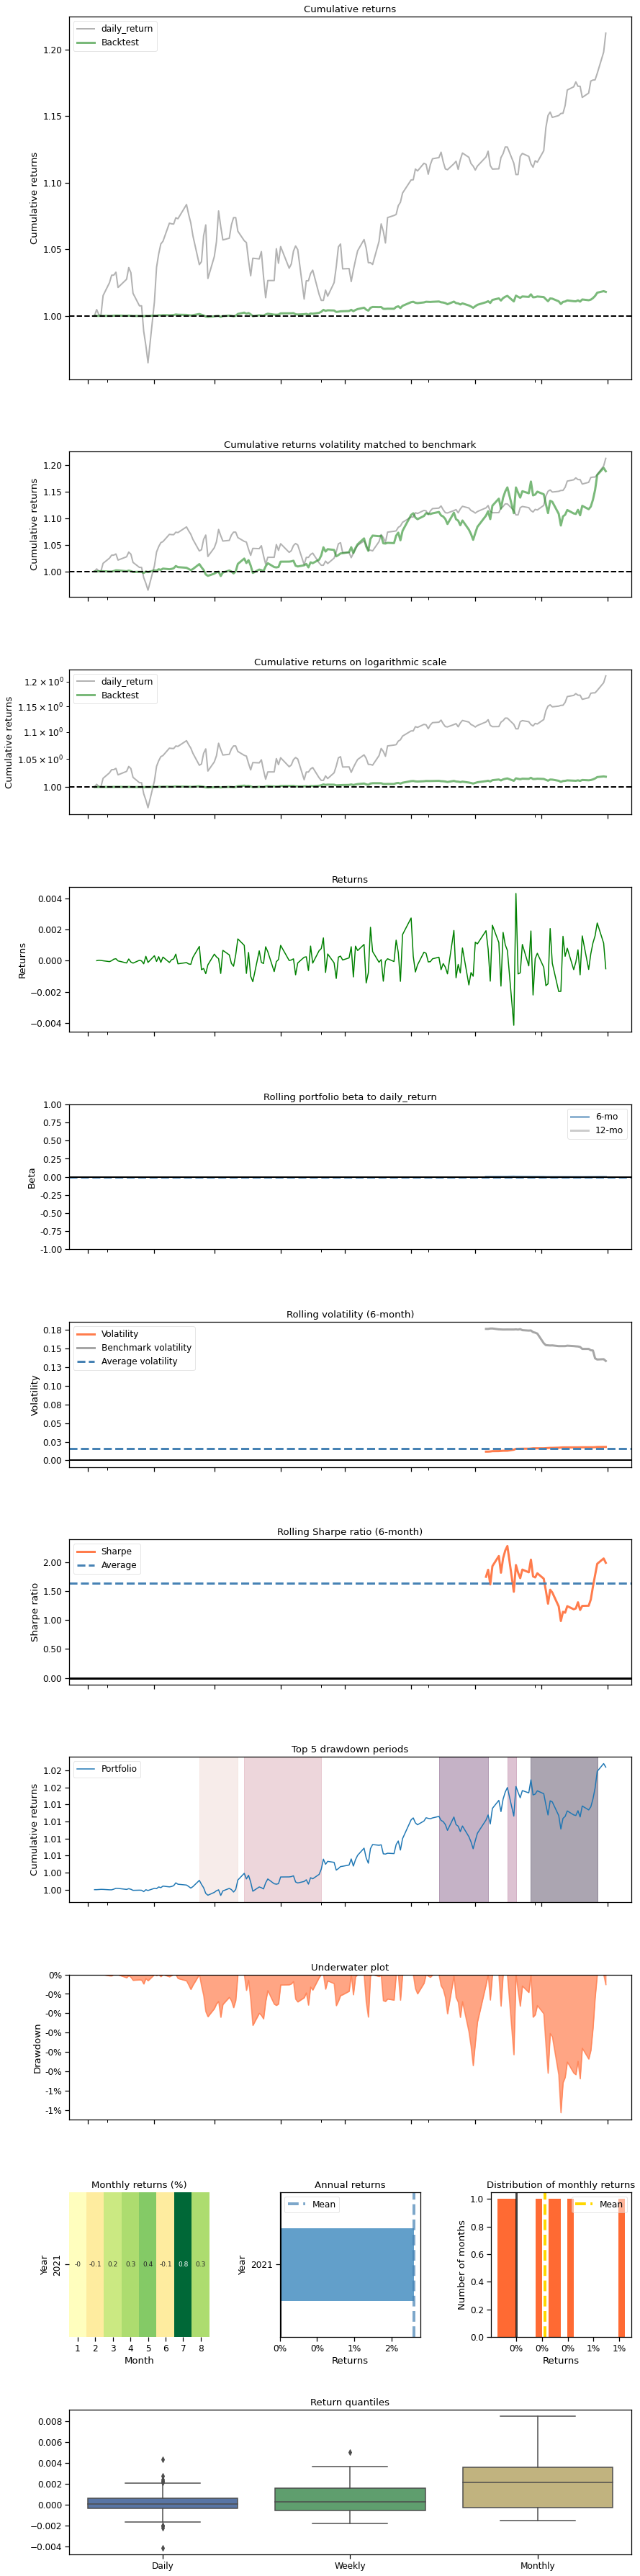

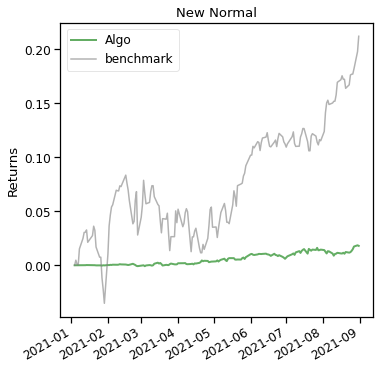

In [ ]:
""" BackTest Plot """
# YOUR CODE HERE
%matplotlib inline
backtest_plot(account_value = df_account_value,     # pass the account value memory into the backtest functions
              baseline_ticker = '^NSEI',             # select a baseline ticker Dow Jones Index: ^DJI, S&P 500: ^GSPC, NASDAQ 100: ^NDX
              baseline_start = '2020-01-01', 
              baseline_end =  '2021-09-01')

### DashBoard (2 points)

Dash is a simple open source library. It is the original low-code framework for rapidly building data apps in Python, R, Julia, and F#. It can bind a user interface to Python code in less than 10 minutes.

Dash apps are rendered in the web browser. Since Dash apps are viewed in the web browser, Dash is inherently cross-platform and mobile ready.

Dash is released under the permissive MIT license. Plotly develops Dash and also offers a platform for writing and deploying Dash apps.

Refer to Dash Documentation [here](https://dash.plotly.com/). Mainly refer to Part 2 (Layout) and Part 3 (Basic callbacks) within the Dash tutorial in the given documentation. 

To know more about Dash, refer [here](https://medium.com/plotly/introducing-jupyterdash-811f1f57c02e).



#### Create the dashboard using Dash HTML components

Hint: [Layout](https://dash.plotly.com/layout) , [callbacks](https://dash.plotly.com/basic-callbacks)

* Scatter plot of Stock closing price 
  * Create a dropdown for ticker Symbols
  * Create a plot of stock closing price values that changes upon selecting ticker using drop down
* Bar plot of trade off balance resulted from DRL Agent 
  * Create two dropdowns for selecting start and end dates
  * Create a bar plot showing account value between start and end date as a result to dropdown change.


In [2]:
import plotly.express as px
from jupyter_dash import JupyterDash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output,State

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [38]:
""" Build App """
app = JupyterDash(__name__)
# YOUR CODE HERE

In [7]:
df = px.data.stocks()

In [14]:
df.columns

Index(['GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'], dtype='object')

In [11]:
df.head()
df.set_index('date', inplace=True)

In [50]:
import plotly.express as px

df = px.data.stocks(indexed=True)-1
fig = px.bar(df, x=df.index, y="GOOG")
fig.show()

In [28]:
import plotly.express as px

df = px.data.stocks(indexed=True)-1
fig = px.area(df, facet_col="company", facet_col_wrap=2)
fig.show()

In [53]:
import plotly.express as px
df = px.data.stocks()
fig = px.line(df, x="date", y=df.columns,
              hover_data={"date": "|%B %d, %Y"},
              title='custom tick labels')
fig.update_xaxes(
    dtick="M1",
    tickformat="%b\n%Y")
fig.show()

In [33]:
# Using graph_objects

import plotly.graph_objects as go
import datetime

x = [datetime.datetime(year=2013, month=10, day=4),
     datetime.datetime(year=2013, month=11, day=5),
     datetime.datetime(year=2013, month=12, day=6)]

fig = go.Figure(data=[go.Scatter(x=x, y=[1, 3, 6])])
# Use datetime objects to set xaxis range
fig.update_layout(xaxis_range=[datetime.datetime(2013, 10, 17),
                               datetime.datetime(2013, 11, 20)])
fig.show()

In [71]:
from jupyter_dash import JupyterDash
from dash import html, dcc
import plotly.graph_objects as go # or plotly.express as px

app = JupyterDash()
app.layout = html.Div([
    html.H4('Stock price analysis'),
    dcc.Graph(id="time-series-chart"),
    html.P("Select stock:"),
    dcc.Dropdown(
        id="ticker",
        value='AMZN',
        options=[{'label': i, 'value': i} for i in df.columns],
        clearable=False,
    ),
])


@app.callback(
    Output("time-series-chart", "figure"), 
    Input("ticker", "value"))
def display_time_series(ticker):
    df = px.data.stocks() # replace with your own data source
    fig = px.line(df, x='date', y=ticker)
    return fig

app.run_server(mode='external', port=8060)

Dash app running on:


<IPython.core.display.Javascript object>

In [57]:
app._terminate_server_for_port("localhost", 8060) 

AttributeError: ignored

### Report Analysis

* Discuss on the parameters used to increase the reward
* Report the safest stocks to trade without much loss
* Comment on the Dashboard application and user interface
